In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [63]:
data=pd.read_csv("C://Users//Hari//Downloads//archive.zip")

In [64]:
data.sample(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9305,9306,15598046,Su,662,France,Female,39,5,139562.05,2,1,0,61636.22,0
1401,1402,15619029,Bykov,620,Spain,Female,43,2,0.00,2,1,0,20670.10,0
1964,1965,15738318,Kung,800,France,Female,40,5,97764.41,1,1,0,98640.15,1
9795,9796,15738980,Yobanna,506,France,Male,43,2,0.00,2,1,0,105568.60,0
4251,4252,15720847,Sheffield,601,France,Male,35,2,0.00,2,1,1,118983.18,0
5235,5236,15608528,Munro,645,France,Female,68,9,0.00,4,1,1,176353.87,1
5744,5745,15776850,Smith,749,Spain,Female,43,1,124209.02,1,1,1,167179.48,0
6685,6686,15606861,Tien,636,France,Male,34,8,0.00,2,1,0,38570.13,0
7352,7353,15809800,Korovina,726,France,Female,38,4,0.00,2,0,0,6787.48,0
7537,7538,15773776,Ho,655,France,Female,38,6,0.00,1,1,1,188639.28,0


In [65]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [66]:
data.drop('RowNumber',axis='columns',inplace=True)

In [67]:
data.sample(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2642,15581548,Kaodilinakachukwu,637,Spain,Female,22,5,98800.00,1,1,0,122865.55,0
7512,15631267,Lu,641,France,Male,50,6,153590.73,2,1,1,130910.78,0
318,15677512,McEncroe,628,Spain,Female,22,3,0.00,1,1,0,85426.28,0
6397,15675888,Austin,550,Spain,Female,33,9,72788.03,1,1,1,103608.06,0
3407,15797760,Bogdanov,632,France,Male,40,3,193354.86,2,1,0,149188.41,0
2441,15691446,Tokaryev,735,Spain,Male,29,10,0.00,2,1,1,95025.27,0
9751,15789339,Yen,681,France,Male,59,4,122781.51,1,0,1,140166.95,0
1239,15660422,Chung,569,France,Male,28,7,0.00,2,1,0,73977.23,0
1978,15792329,Mao,494,Germany,Male,37,5,107106.33,2,1,0,172063.09,0
745,15640059,Smith,606,France,Male,40,5,0.00,2,1,1,70899.27,0


In [68]:
data.drop('CustomerId',axis='columns',inplace=True)

In [69]:
data.head(20)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [70]:
data.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [71]:
data[data.IsActiveMember==0].Tenure

2       8
3       1
5       8
7       4
10      6
       ..
9993    7
9994    2
9995    5
9998    3
9999    4
Name: Tenure, Length: 4849, dtype: int64

(array([[219., 569., 560., 524., 500., 506., 499., 535., 519., 720.],
        [194., 466., 488., 485., 489., 506., 468., 493., 506., 754.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

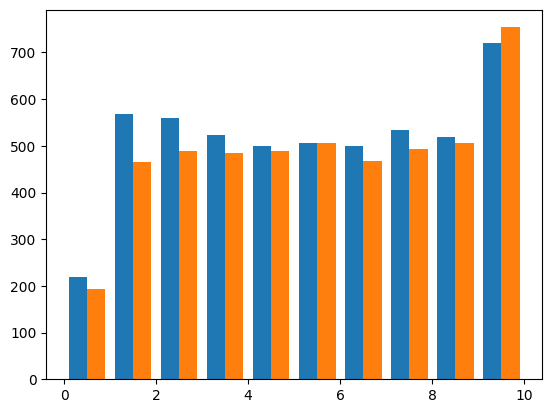

In [72]:
no=data[data.IsActiveMember==0].Tenure
yes=data[data.IsActiveMember==1].Tenure
plt.hist([yes,no])

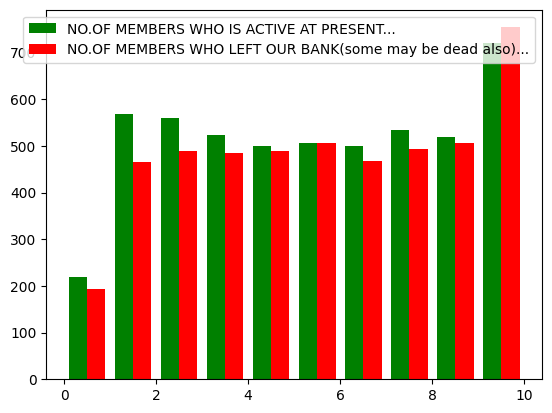

In [73]:
no=data[data.IsActiveMember==0].Tenure
yes=data[data.IsActiveMember==1].Tenure
plt.hist([yes,no],color=['green','red'],label=['NO.OF MEMBERS WHO IS ACTIVE AT PRESENT...','NO.OF MEMBERS WHO LEFT OUR BANK(some may be dead also)...'])
plt.legend()

In [74]:
for columns in data:
    print(data[columns].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 64

In [75]:
for columns in data:
    print(f'{columns}:{data[columns].unique()}')

Surname:['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 61

In [76]:
data['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [77]:
data['Gender'].unique()

array([1, 0], dtype=int64)

In [78]:
data.drop('Surname',axis='columns',inplace=True)

In [79]:
for columns in data:
    print(f'{columns}:{data[columns].unique()}')

CreditScore:[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 56

In [80]:
data.head(25)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1
6,822,France,0,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1
8,501,France,0,44,4,142051.07,2,0,1,74940.50,0
9,684,France,0,27,2,134603.88,1,1,1,71725.73,0


In [81]:
data["Tenure"].value_counts().values

array([1048, 1035, 1028, 1025, 1012, 1009,  989,  984,  967,  490,  413],
      dtype=int64)

In [82]:
data = pd.get_dummies(data, columns=['Geography'],dtype=int,drop_first=True)

In [83]:
data = pd.get_dummies(data, columns=['CreditScore'],dtype=int,drop_first=True)

In [84]:
data = pd.get_dummies(data, columns=['Age'],dtype=int,drop_first=True)

In [85]:
data = pd.get_dummies(data, columns=['Tenure'],dtype=int,drop_first=True)

In [86]:
data = pd.get_dummies(data, columns=['Balance'],dtype=int,drop_first=True)

In [87]:
data = pd.get_dummies(data, columns=['NumOfProducts'],dtype=int,drop_first=True)

In [88]:
data = pd.get_dummies(data, columns=['EstimatedSalary'],dtype=int,drop_first=True)

In [89]:
data.head(25)

,Gender,HasCrCard,IsActiveMember,Exited,Geography_Germany,Geography_Spain,CreditScore_351,CreditScore_358,CreditScore_359,CreditScore_363,...,EstimatedSalary_199805.63,EstimatedSalary_199808.1,EstimatedSalary_199841.32,EstimatedSalary_199857.47,EstimatedSalary_199862.75,EstimatedSalary_199909.32,EstimatedSalary_199929.17,EstimatedSalary_199953.33,EstimatedSalary_199970.74,EstimatedSalary_199992.48
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
data.dtypes

Gender                       int64
HasCrCard                    int64
IsActiveMember               int64
Exited                       int64
Geography_Germany            int32
                             ...  
EstimatedSalary_199909.32    int32
EstimatedSalary_199929.17    int32
EstimatedSalary_199953.33    int32
EstimatedSalary_199970.74    int32
EstimatedSalary_199992.48    int32
Length: 16926, dtype: object

In [91]:
x=data.drop('IsActiveMember',axis='columns')
y=data['IsActiveMember']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.19,random_state=8)

In [92]:
x_train.shape


(8100, 16925)

In [93]:
x_test.shape

(1900, 16925)

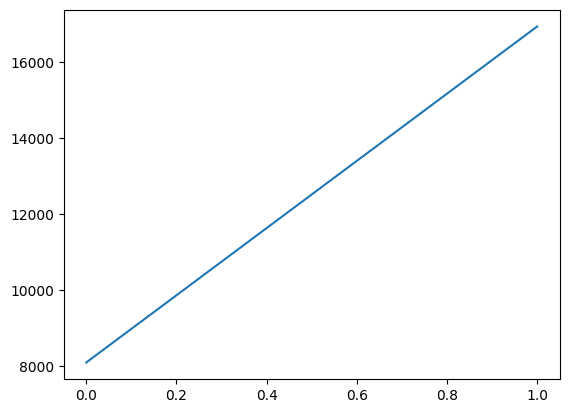

In [94]:
plt.plot(x_train.shape)

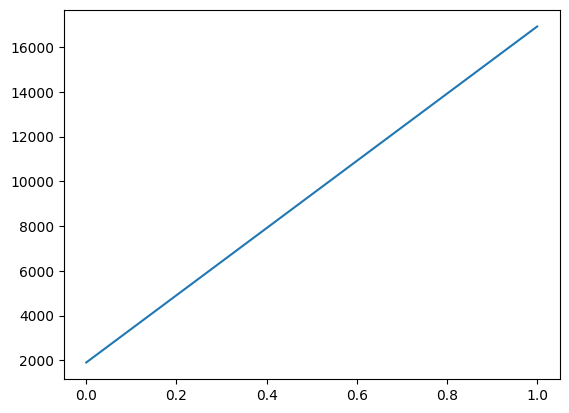

In [95]:
plt.plot(x_test.shape)

In [96]:
x_train[:11]

,Gender,HasCrCard,Exited,Geography_Germany,Geography_Spain,CreditScore_351,CreditScore_358,CreditScore_359,CreditScore_363,CreditScore_365,...,EstimatedSalary_199805.63,EstimatedSalary_199808.1,EstimatedSalary_199841.32,EstimatedSalary_199857.47,EstimatedSalary_199862.75,EstimatedSalary_199909.32,EstimatedSalary_199929.17,EstimatedSalary_199953.33,EstimatedSalary_199970.74,EstimatedSalary_199992.48
3899,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3990,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5956,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7429,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9303,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7680,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8296,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2702,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6049,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7209,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
x_test[:11]

,Gender,HasCrCard,Exited,Geography_Germany,Geography_Spain,CreditScore_351,CreditScore_358,CreditScore_359,CreditScore_363,CreditScore_365,...,EstimatedSalary_199805.63,EstimatedSalary_199808.1,EstimatedSalary_199841.32,EstimatedSalary_199857.47,EstimatedSalary_199862.75,EstimatedSalary_199909.32,EstimatedSalary_199929.17,EstimatedSalary_199953.33,EstimatedSalary_199970.74,EstimatedSalary_199992.48
837,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1197,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6759,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5651,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3913,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3056,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4291,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5452,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
len(x_train.columns)

16925

In [99]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer



In [100]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [101]:

selector = SelectKBest(f_classif, k=100) 
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)



In [102]:

from sklearn.ensemble import RandomForestClassifier

model1= RandomForestClassifier(n_estimators=100, random_state=42)


In [103]:
model1.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:

y_pred = model1.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5873684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.43      0.49       885
           1       0.59      0.72      0.65      1015

    accuracy                           0.59      1900
   macro avg       0.58      0.58      0.57      1900
weighted avg       0.59      0.59      0.58      1900

Confusion Matrix:
 [[381 504]
 [280 735]]


<Axes: >

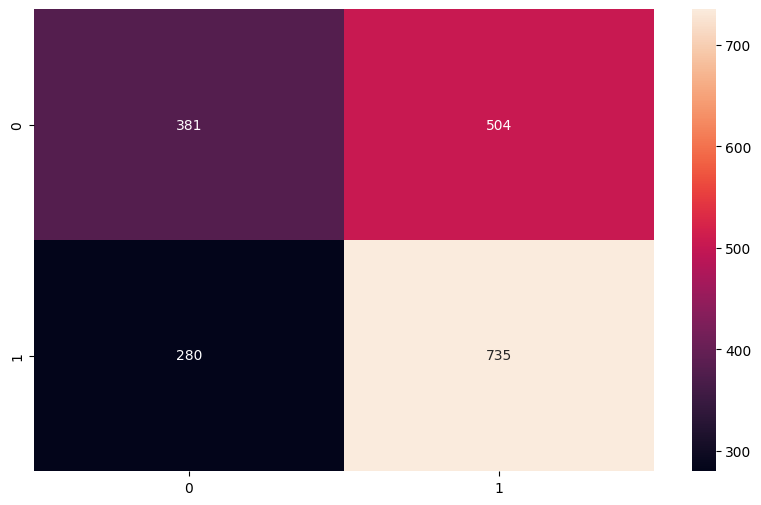

In [105]:
import seaborn as sns
from sklearn.metrics import confusion_matrix



a = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(a, annot=True, fmt='d')

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
model2=LogisticRegression(random_state=50)

In [108]:
model2.fit(x_train, y_train)




LogisticRegression(random_state=50)

In [109]:
y_pred = model2.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5552631578947368
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51       885
           1       0.58      0.60      0.59      1015

    accuracy                           0.56      1900
   macro avg       0.55      0.55      0.55      1900
weighted avg       0.55      0.56      0.55      1900



<Axes: >

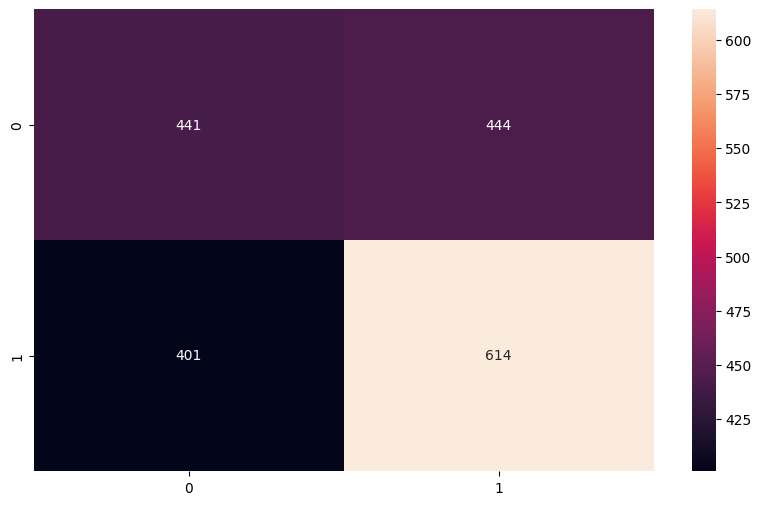

In [110]:
import seaborn as sns
from sklearn.metrics import confusion_matrix



a = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(a, annot=True, fmt='d')

In [111]:
model3=DecisionTreeClassifier(random_state=45,)

In [112]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(random_state=45)

In [113]:
y_pred = model3.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5673684210526316
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.57      0.55       885
           1       0.60      0.57      0.58      1015

    accuracy                           0.57      1900
   macro avg       0.57      0.57      0.57      1900
weighted avg       0.57      0.57      0.57      1900



<Axes: >

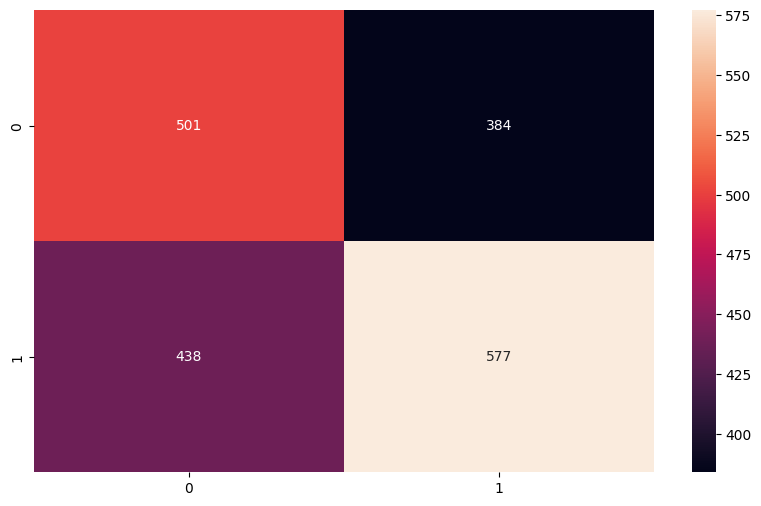

In [114]:
import seaborn as sns
from sklearn.metrics import confusion_matrix



a = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(a, annot=True, fmt='d')

In [115]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()

In [116]:
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [117]:
y_pred = model4.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5142105263157895
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.31      0.38       885
           1       0.54      0.69      0.60      1015

    accuracy                           0.51      1900
   macro avg       0.50      0.50      0.49      1900
weighted avg       0.50      0.51      0.50      1900



<Axes: >

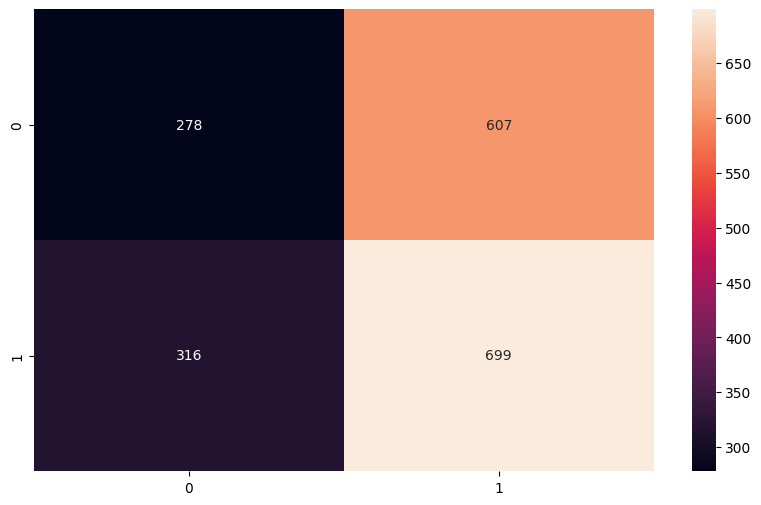

In [118]:
import seaborn as sns
from sklearn.metrics import confusion_matrix



a = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(a, annot=True, fmt='d')

In [119]:
model5=XGBClassifier(random_state=50)


In [120]:
model5.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=50, ...)

In [121]:
y_pred = model5.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5605263157894737
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.42      0.47       885
           1       0.57      0.68      0.62      1015

    accuracy                           0.56      1900
   macro avg       0.56      0.55      0.55      1900
weighted avg       0.56      0.56      0.55      1900



<Axes: >

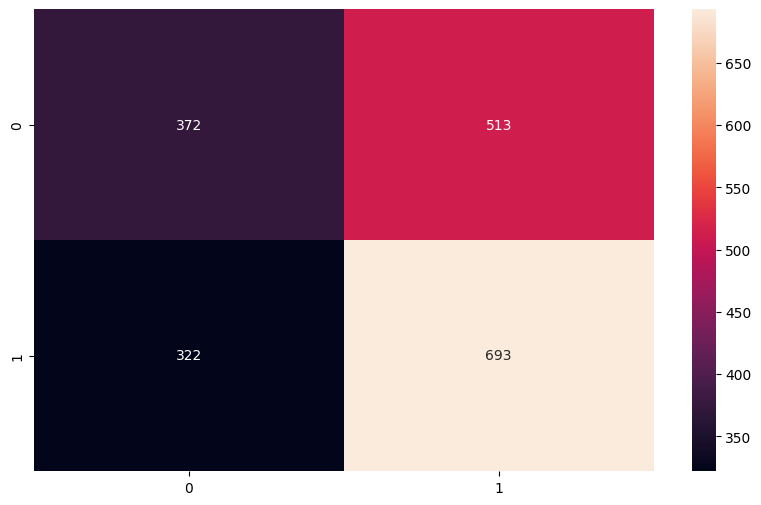

In [122]:
import seaborn as sns
from sklearn.metrics import confusion_matrix



a = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(a, annot=True, fmt='d')